In [40]:
!which python

/Users/sifat/miniconda3/envs/data-science/bin/python


In [41]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [43]:
sns.set()

In [44]:
df_train = pd.read_csv('data/train.csv')

In [45]:
df_test = pd.read_csv('data/test.csv')

In [46]:
df_train.shape

(42000, 785)

In [47]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [214]:
X_train = df_train.drop(columns='label')
y_train = df_train['label']


In [84]:
# trainData, testData = train_test_split(df_train, test_size=0.25)

# X_train = trainData.drop(columns='label')
# X_train = X_train.astype('float') / 255.0
# y_train = trainData['label']

# X_test = testData.drop(columns='label')
# X_test = X_test.astype('float') / 255.0
# y_test = testData['label']

In [215]:
trainData, testData = train_test_split(df_train, test_size=0.25)

X_train = trainData.drop(columns='label')
X_train = X_train.astype('float') / 255.0
y_train = trainData['label']

X_test = testData.drop(columns='label')
X_test = X_test.astype('float') / 255.0
y_test = testData['label']

X_train = X_train.to_numpy()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

X_test = X_test.to_numpy()
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)



# Plot Images

In [216]:
def plot_image(image_data, label = 'label', plt = plt):
    plt.imshow(image_data.reshape(28, 28), cmap='gray')
    plt.grid(False)
    plt.set_xticks([])
    plt.set_yticks([])

In [217]:
def plot_image_list(imageDataList, labelList, plot_size = 10, fig_size = 10):
    fig, axs = plt.subplots(plot_size, plot_size, figsize=(fig_size, fig_size))
    for label in set(labelList):
        images = imageDataList[labelList == label][:10]
        for i, image in enumerate(images):
            plot_image(image, label, plt=axs[label, i])

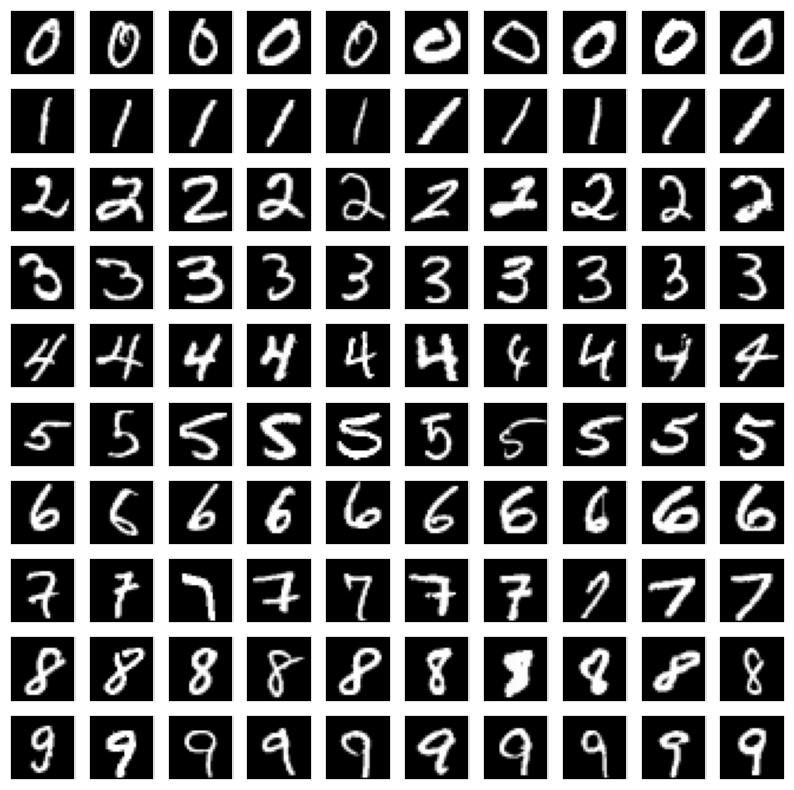

In [218]:
plot_image_list(X_train, y_train)

# Create model (perceptron)

In [76]:
# model = keras.Sequential([
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dropout(.3),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dropout(.3),
#     keras.layers.Dense(10, activation='softmax')
# ])

In [219]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)),
    keras.layers.Conv2D(32, kernel_size=(3, 3)),
    
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(64, kernel_size=(3, 3)),
    keras.layers.Conv2D(64, kernel_size=(3, 3)),
    
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(.4),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(.4),
    keras.layers.Dense(10, activation='softmax')
])

In [221]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [222]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
985/985 [==============================] - 17s 17ms/step - loss: 0.3454 - accuracy: 0.8921 - val_loss: 0.1387 - val_accuracy: 0.9609
Epoch 2/10
985/985 [==============================] - 17s 17ms/step - loss: 0.1384 - accuracy: 0.9609 - val_loss: 0.0882 - val_accuracy: 0.9736
Epoch 3/10
985/985 [==============================] - 16s 16ms/step - loss: 0.1108 - accuracy: 0.9688 - val_loss: 0.0781 - val_accuracy: 0.9787
Epoch 4/10
985/985 [==============================] - 16s 16ms/step - loss: 0.0997 - accuracy: 0.9716 - val_loss: 0.0671 - val_accuracy: 0.9820
Epoch 5/10
985/985 [==============================] - 16s 16ms/step - loss: 0.0894 - accuracy: 0.9752 - val_loss: 0.0737 - val_accuracy: 0.9801
Epoch 6/10
985/985 [==============================] - 16s 16ms/step - loss: 0.0831 - accuracy: 0.9757 - val_loss: 0.0867 - val_accuracy: 0.9768
Epoch 7/10
985/985 [==============================] - 16s 16ms/step - loss: 0.0798 - accuracy: 0.9776 - val_loss: 0.0732 - val_accuracy:

In [223]:
def plot_history(history):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].plot(history.history['accuracy'], label="training accuracy")
    axs[0].plot(history.history['val_accuracy'], label="validation accuracy")
    axs[0].legend()
    axs[0].set_ylim(0.5,1)

    axs[1].plot(history.history['loss'], label="training loss")
    axs[1].plot(history.history['val_loss'], label="validation loss")
    axs[1].legend()


    plt.suptitle('Training Vs Validation Accuracy and Loss')
    plt.show()

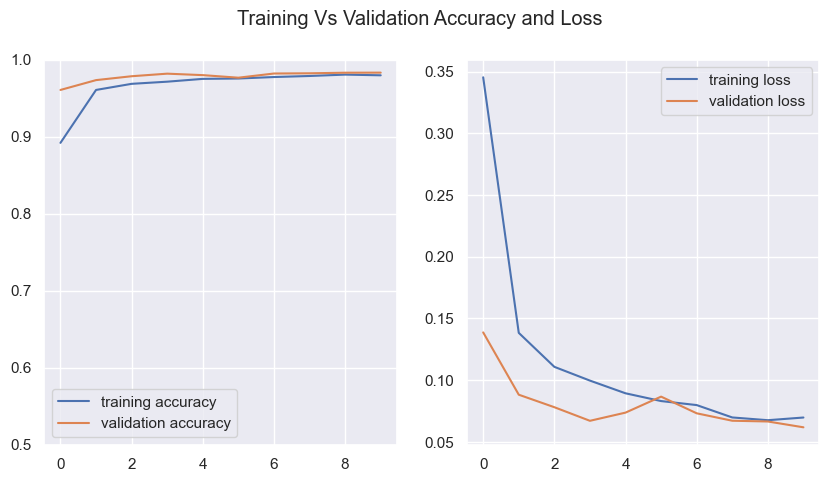

In [224]:
plot_history(history)

In [225]:
model.evaluate(X_test, y_test)

329/329 [==============================] - 2s 5ms/step - loss: 0.0618 - accuracy: 0.9833


[0.06183347851037979, 0.9833333492279053]

In [226]:
model.save('mnist_CNN.h5')